In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action = 'ignore')
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel("EV_Distribution_Datasets.xlsx")

### Data Preprocessing

In [3]:
df.shape   # Checking data dimesionality

(32, 8)

In [4]:
df.head()

,Sr. No.,Zone,State Name,No. of Operational PCS,No. of EV chargers sanctioned,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Southern,Andaman & Nicobar Island,3,10.0,162,146945,147107
1,2,North Eastern,Arunachal Pradesh,9,NaN,20,252965,252985
2,3,North Eastern,Assam,48,20.0,64766,4677053,4741819
3,4,Eastern,Bihar,83,37.0,83335,10407078,10490413
4,5,Northern,Chandigarh,6,70.0,2812,746881,749693


#### Checking for Duplicates

In [5]:
df.duplicated().sum()    # We don't have any duplicate record in the dataset.

0

#### Missing value treatment

In [6]:
df.isnull().sum()        # we have few missing values for the feature "No. of EV chargers sanctioned"

Sr. No.                          0
Zone                             0
State Name                       0
No. of Operational PCS           0
No. of EV chargers sanctioned    8
Total Electric Vehicle           0
Total Non-Electric Vehicle       0
Total                            0
dtype: int64

In [7]:
# As per PIB information report : If "No. of EV chargers sanctioned" information is not present for any particular state, that
# means for that state no new EV chargers permission has been sanctioned. Hence we have decided to replace the null values with
# zero imputation.

In [8]:
df['No. of EV chargers sanctioned'] = df['No. of EV chargers sanctioned'].fillna(0)

In [9]:
df.head()

,Sr. No.,Zone,State Name,No. of Operational PCS,No. of EV chargers sanctioned,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Southern,Andaman & Nicobar Island,3,10.0,162,146945,147107
1,2,North Eastern,Arunachal Pradesh,9,0.0,20,252965,252985
2,3,North Eastern,Assam,48,20.0,64766,4677053,4741819
3,4,Eastern,Bihar,83,37.0,83335,10407078,10490413
4,5,Northern,Chandigarh,6,70.0,2812,746881,749693


In [10]:
df.isnull().sum()

Sr. No.                          0
Zone                             0
State Name                       0
No. of Operational PCS           0
No. of EV chargers sanctioned    0
Total Electric Vehicle           0
Total Non-Electric Vehicle       0
Total                            0
dtype: int64

#### Dropping Unwanted features

In [11]:
df.drop(['Sr. No.'], axis = 1, inplace = True)

In [12]:
df.columns

Index(['Zone', 'State Name', 'No. of Operational PCS',
       'No. of EV chargers sanctioned', 'Total Electric Vehicle',
       'Total Non-Electric Vehicle', 'Total'],
      dtype='object')

#### Feature Engineering

In [13]:
df['EV_potential'] = df['Total Electric Vehicle'] / df['Total']

In [14]:
df.head()

,Zone,State Name,No. of Operational PCS,No. of EV chargers sanctioned,Total Electric Vehicle,Total Non-Electric Vehicle,Total,EV_potential
0,Southern,Andaman & Nicobar Island,3,10.0,162,146945,147107,0.001101
1,North Eastern,Arunachal Pradesh,9,0.0,20,252965,252985,0.000079
2,North Eastern,Assam,48,20.0,64766,4677053,4741819,0.013658
3,Eastern,Bihar,83,37.0,83335,10407078,10490413,0.007944
4,Northern,Chandigarh,6,70.0,2812,746881,749693,0.003751


#### Data Analysis

In [377]:
df.select_dtypes(include = np.number).columns

Index(['No. of Operational PCS', 'No. of EV chargers sanctioned',
       'Total Electric Vehicle', 'Total Non-Electric Vehicle', 'Total',
       'EV_potential'],
      dtype='object')

#### Univariate Analysis

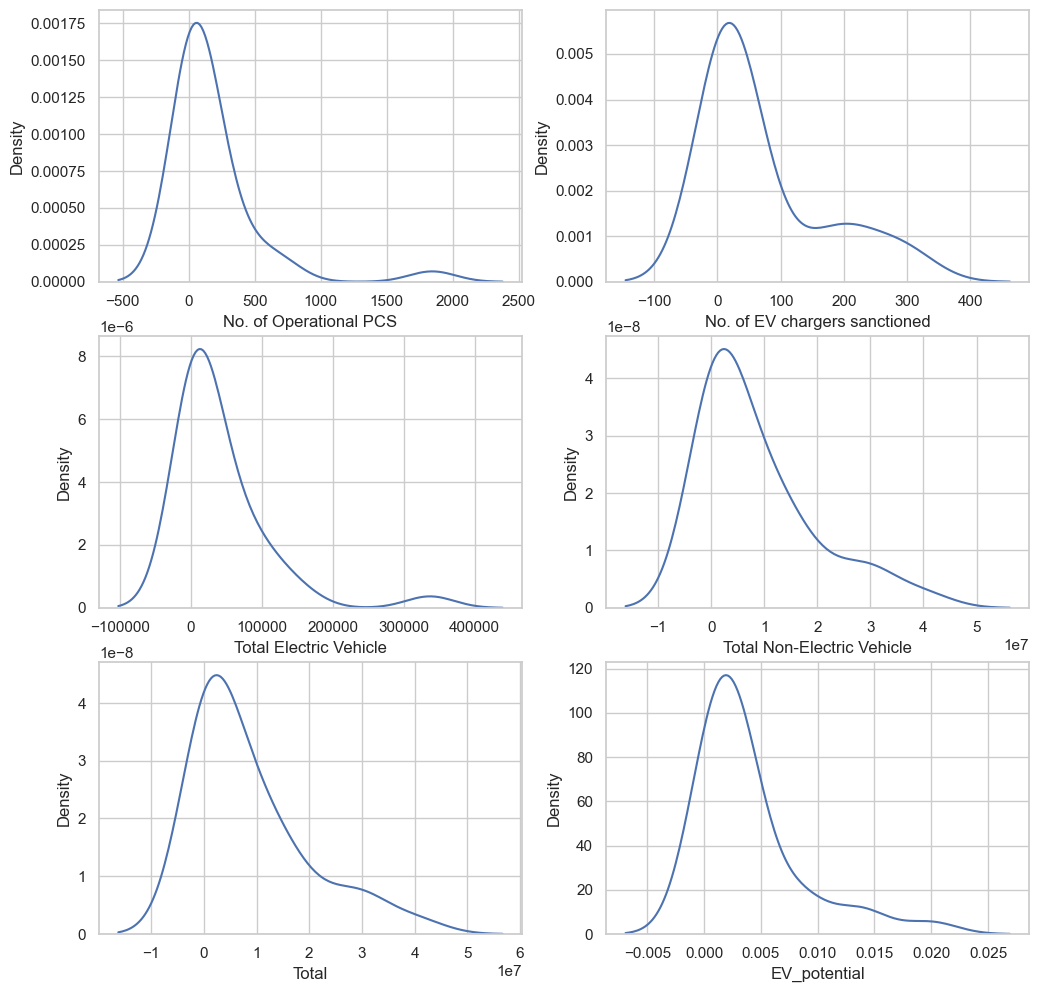

In [378]:
fig , ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
for var, subplot in zip(df.select_dtypes(include = np.number).columns[:], ax.flatten()):
    plt.grid()
    sns.kdeplot(df[var], ax = subplot)

Zone
Central          389154
Eastern          172284
North Eastern     74783
Northern         296524
Southern         235669
Western          165971
Name: Total Electric Vehicle, dtype: int64


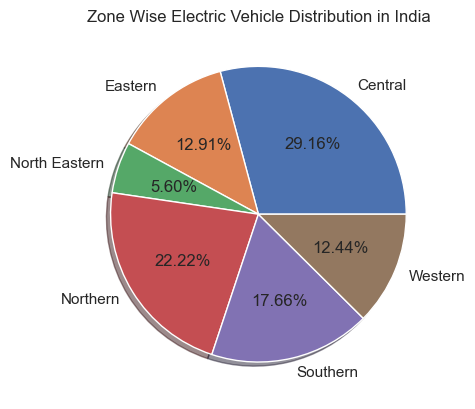

In [379]:
val = df.groupby('Zone')['Total Electric Vehicle'].sum()
print(val)
plt.pie(val, autopct='%0.2f%%', shadow = True, labels = ['Central','Eastern','North Eastern','Northern','Southern','Western'])
plt.title("Zone Wise Electric Vehicle Distribution in India")
plt.show()

In [380]:
# From the plot it can be seen that Central zone holds 29.16 % of the Electric car distribution share in India, followed by
# Northern Zone. Distribution is minimum in North Eastern region

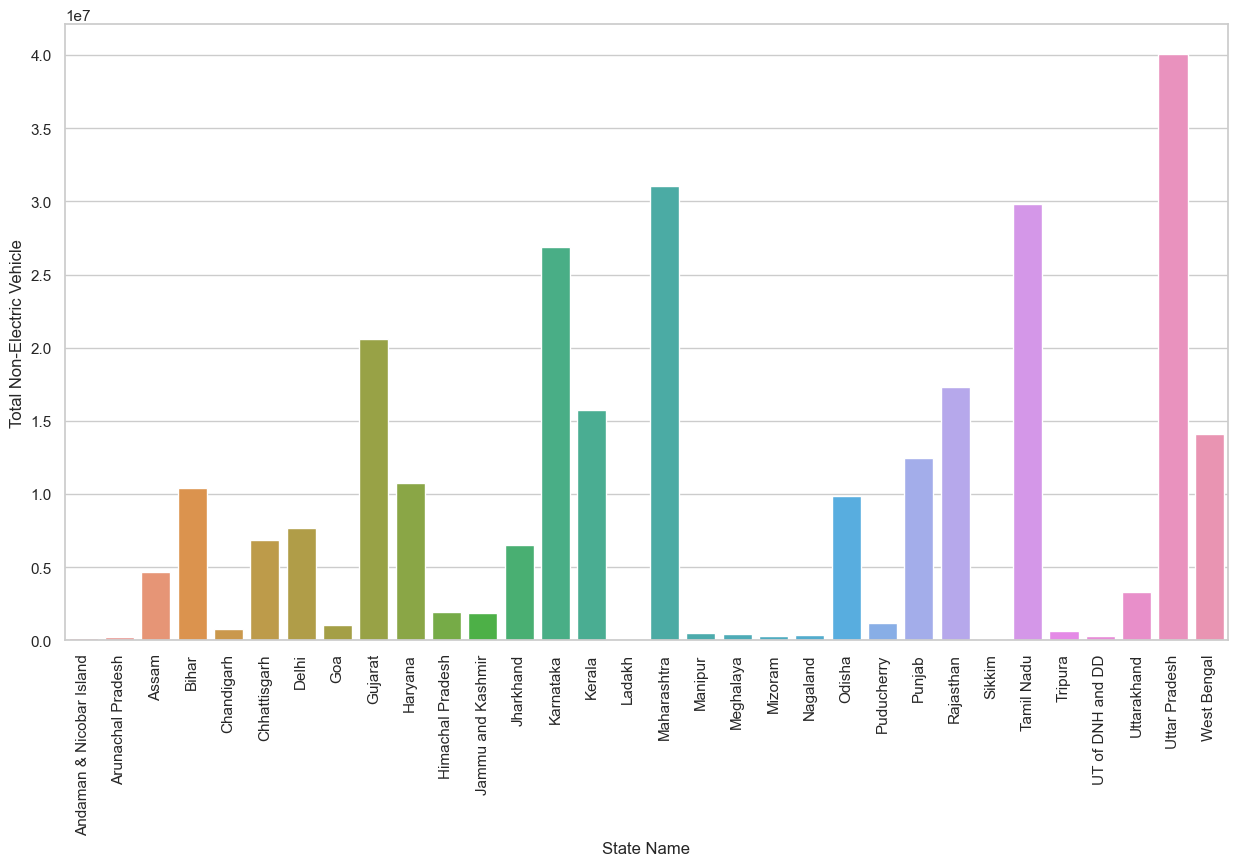

In [381]:
plt.figure(figsize=(15,8))
sns.barplot(x= 'State Name', y='Total Non-Electric Vehicle', data=df)
plt.xticks(rotation = 90)
plt.show()

In [382]:
# State wise Uttar Pradesh has highest number of electric vehicle

In [26]:
df.groupby('State Name')[['State Name','EV_potential']].mean('EV_potential').sort_values(by='EV_potential',ascending=False).head()

,EV_potential
State Name,
Delhi,0.019943
Tripura,0.014048
Assam,0.013658
Uttarakhand,0.009275
Uttar Pradesh,0.008340


In [ ]:
# Top 5 States and UT with highest EV potential.

Zone
Central           500
Eastern           449
North Eastern     118
Northern         2516
Southern         1344
Western           900
Name: No. of Operational PCS, dtype: int64


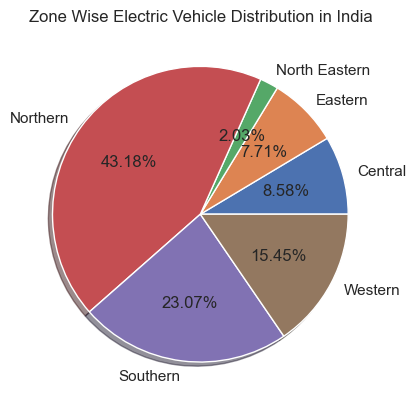

In [383]:
val = df.groupby('Zone')['No. of Operational PCS'].sum()
print(val)
plt.pie(val, autopct='%0.2f%%', shadow = True, labels = ['Central','Eastern','North Eastern','Northern','Southern','Western'])
plt.title("Zone Wise Electric Vehicle Distribution in India")
plt.show()

In [384]:
# Around 43% of the total operational charging station present in the Northern Zone. North Eastern zone is having lowest number
# of charging stations.

In [385]:
crgst = df.groupby(['Zone', 'State Name'])[['Zone', 'State Name','No. of Operational PCS']].sum('No. of Operational PCS').sort_values(by=['Zone','No. of Operational PCS'], ascending = False)
crgst

No. of Operational PCS
Zone          State Name                                      
Western       Maharashtra                                  660
              Gujarat                                      195
              Goa                                           44
              UT of DNH and DD                               1
Southern      Karnataka                                    704
              Tamil Nadu                                   441
              Kerala                                       192
              Puducherry                                     4
              Andaman & Nicobar Island                       3
Northern      Delhi                                       1845
              Rajasthan                                    254
              Haryana                                      232
              Punjab                                       126
              Himachal Pradesh                              27
              Jammu and Kashmir                             24
              Chandigarh                                     6
              Ladakh                                         2
North Eastern Assam                                         48
              Meghalaya                                     19
              Tripura                                       18
              Manipur                                       16
              Arunachal Pradesh                              9
              Nagaland                                       6
              Mizoram                                        1
              Sikkim                                         1
Eastern       West Bengal                                  189
              Odisha                                       117
              Bihar                                         83
              Jharkhand                                     60
Central       Uttar Pradesh                                406
              Uttarakhand                                   48
              Chhattisgarh                                  46

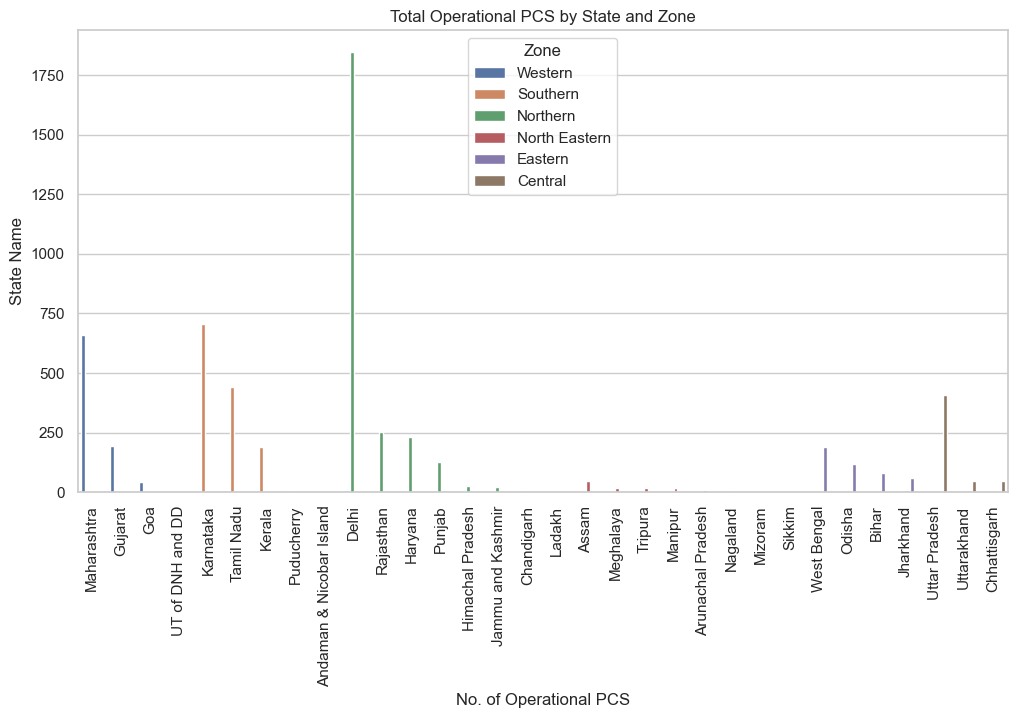

In [386]:
rgst = crgst.reset_index()

# Create the bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Set the figure size

# Use Seaborn's barplot function to create the bar plot
sns.barplot(x="State Name", y="No. of Operational PCS", hue="Zone", data=rgst, ci=None)

# Add labels and a title
plt.xlabel("No. of Operational PCS")
plt.xticks(rotation=90)
plt.ylabel("State Name")
plt.title("Total Operational PCS by State and Zone")

# Display the plot
plt.show()


In [387]:
plt.figure(figsize=(15,25))
val = df.groupby('Zone')['No. of EV chargers sanctioned'].sum()
val =val.reset_index()
print(val)
fig = px.scatter(val, x='Zone', y='No. of EV chargers sanctioned', size='No. of EV chargers sanctioned', title='Bubble Chart for EV Chargers Sanctioned')
fig.update_traces(marker=dict(sizemode='diameter'))

fig.show()

            Zone  No. of EV chargers sanctioned
0        Central                          242.0
1        Eastern                          226.0
2  North Eastern                           89.0
3       Northern                          432.0
4       Southern                          684.0
5        Western                          625.0


<Figure size 1500x2500 with 0 Axes>

In [388]:
# Highest number of charging stations are sanctioned for Southern zone, followed by Western zone.

<Axes: xlabel='No. of EV chargers sanctioned', ylabel='State Name'>

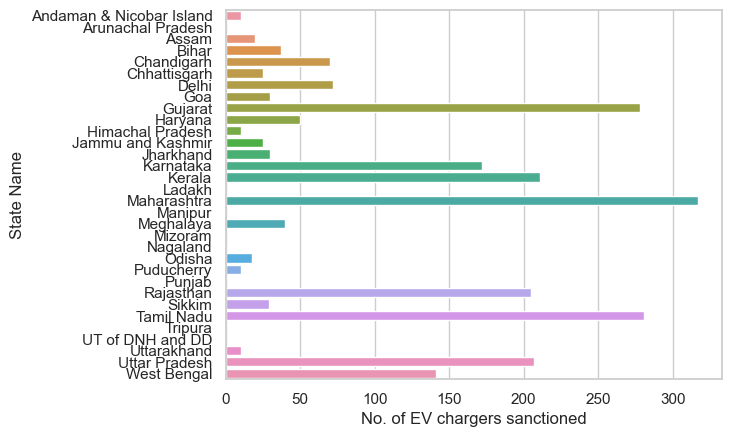

In [389]:
sns.barplot(x='No. of EV chargers sanctioned', y='State Name', data = df
           )

In [390]:
# Highest number of new charging stations sanctioned for Maharashtra, followed by Tamilnadu and Gujarat

In [391]:
df2 = df.groupby('State Name')[['State Name','No. of Operational PCS', 'No. of EV chargers sanctioned','EV_potential']]
df2= df2.head().sort_values(by='EV_potential', ascending = False)
df2

,State Name,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential
6,Delhi,1845,72.0,0.019943
27,Tripura,18,0.0,0.014048
2,Assam,48,20.0,0.013658
29,Uttarakhand,48,10.0,0.009275
30,Uttar Pradesh,406,207.0,0.008340
3,Bihar,83,37.0,0.007944
24,Rajasthan,254,205.0,0.004672
13,Karnataka,704,172.0,0.004466
4,Chandigarh,6,70.0,0.003751
16,Maharashtra,660,317.0,0.003742


In [392]:
df_num = df.select_dtypes(include=np.number)
df_num.columns

Index(['No. of Operational PCS', 'No. of EV chargers sanctioned',
       'Total Electric Vehicle', 'Total Non-Electric Vehicle', 'Total',
       'EV_potential'],
      dtype='object')

In [393]:
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['Zone', 'State Name'], dtype='object')

In [394]:
df.columns

Index(['Zone', 'State Name', 'No. of Operational PCS',
       'No. of EV chargers sanctioned', 'Total Electric Vehicle',
       'Total Non-Electric Vehicle', 'Total', 'EV_potential'],
      dtype='object')

<Axes: >

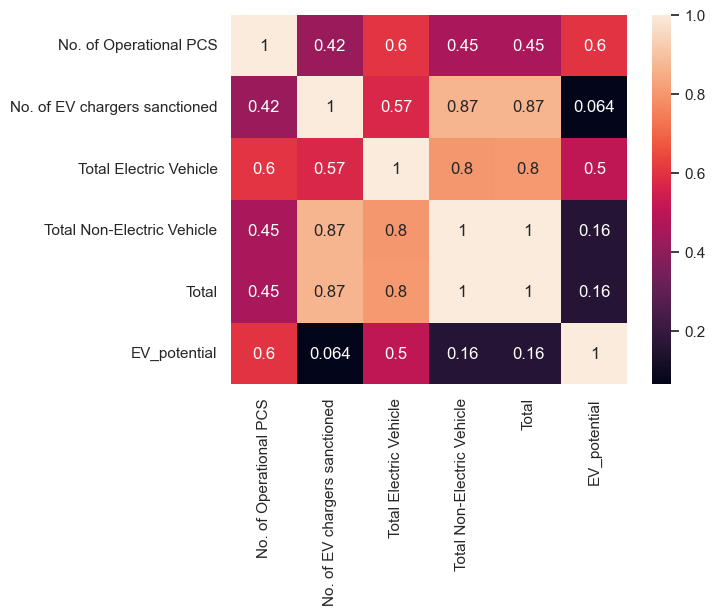

In [395]:
sns.heatmap(df_num.corr(), annot=True)

In [396]:
df_num.drop(['Total Non-Electric Vehicle'], axis = 1, inplace = True)

In [397]:
df_cat.drop(['State Name'], axis = 1, inplace = True)

In [398]:
df_num.drop(['Total Electric Vehicle', 'Total'], axis = 1, inplace = True)

In [399]:
df_num.head()

,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential
0,3,10.0,0.001101
1,9,0.0,0.000079
2,48,20.0,0.013658
3,83,37.0,0.007944
4,6,70.0,0.003751


In [400]:
ss = StandardScaler()

In [401]:
for i in df_num.columns:
    df_num[i] = ss.fit_transform(df_num[i].values.reshape(-1,1))

In [402]:
#df_num['No. of Operational PCS'] = ss.fit_transform(df_num['No. of Operational PCS'].values.reshape(-1,1))

In [403]:
#df_num['No. of EV chargers sanctioned'] = ss.fit_transform(df_num['No. of EV chargers sanctioned'].values.reshape(-1,1))

In [404]:
df_num.head()

,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential
0,-0.512115,-0.648041,-0.609198
1,-0.494958,-0.752881,-0.832441
2,-0.383438,-0.543201,2.133278
3,-0.283357,-0.364974,0.885230
4,-0.503537,-0.019002,-0.030524


#### PCA

In [405]:
pca = PCA(random_state=1)

In [406]:
components = pca.fit_transform(df_num)

In [407]:
components.shape

(32, 3)

In [409]:
df_pca = pd.DataFrame(components, columns = ['PC1', 'PC2', 'PC3'])

In [410]:
df_pca.head()

,PC1,PC2,PC3
0,-0.986316,0.166469,0.229804
1,-1.148880,0.124939,0.411384
2,0.736504,1.655768,-1.307272
3,0.159545,0.797690,-0.579107
4,-0.374431,-0.016925,-0.338167


In [411]:
df_pca.describe() # Five point summary analysis

,PC1,PC2,PC3
count,3.200000e+01,3.200000e+01,3.200000e+01
mean,6.938894e-17,-4.163336e-17,-6.938894e-18
std,1.349807e+00,9.850504e-01,5.517900e-01
min,-1.166300e+00,-2.083322e+00,-1.338966e+00
25%,-9.889194e-01,-3.069131e-01,-2.998523e-01
50%,-5.316232e-01,1.346935e-01,1.507770e-01
75%,6.612873e-01,2.678928e-01,3.232051e-01
max,5.323303e+00,2.148733e+00,1.395202e+00


In [412]:
pca.feature_names_in_

array(['No. of Operational PCS', 'No. of EV chargers sanctioned',
       'EV_potential'], dtype=object)

In [413]:
pca.explained_variance_

array([1.82197774, 0.97032422, 0.30447223])

In [414]:
pca.explained_variance_ratio_

array([0.58834698, 0.31333386, 0.09831916])

<Axes: >

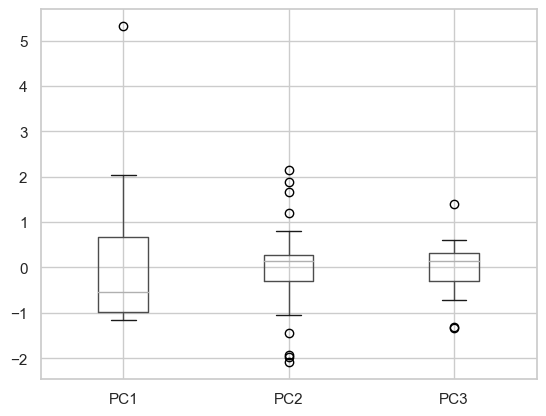

In [415]:
df_pca.boxplot()

#### Encoding categorical features

In [416]:
le = LabelEncoder()
df_cat['Zone'] = le.fit_transform(df_cat['Zone'])

In [417]:
df_cat.head()

,Zone
0,4
1,2
2,2
3,1
4,3


In [418]:
#df_num.drop(['Total Electric Vehicle', 'Total'], axis = 1, inplace = True)

In [441]:
features = pd.concat([df_num, df_cat], axis = 1)         # Concating numerical and categorical features.

In [442]:
features.head()

,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential,Zone
0,-0.512115,-0.648041,-0.609198,4
1,-0.494958,-0.752881,-0.832441,2
2,-0.383438,-0.543201,2.133278,2
3,-0.283357,-0.364974,0.885230,1
4,-0.503537,-0.019002,-0.030524,3


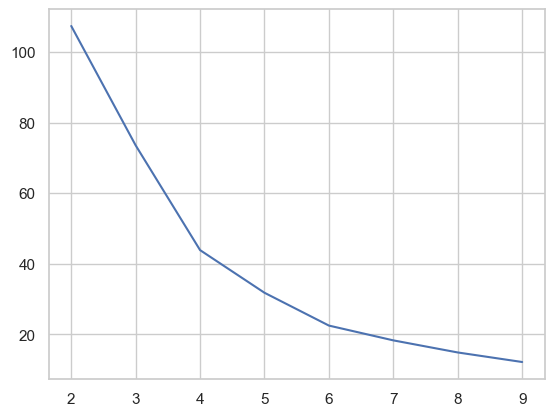

In [443]:
wcss = []
for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(features)
    wcss.append(model.inertia_)
plt.plot(range(2,10), wcss)

In [444]:
for i in range(2,9):
    model = KMeans(n_clusters=i, random_state=1)
    predict = model.fit_predict(features)
    coeff = silhouette_score(features, predict, random_state=1)
    print(i,coeff)

2 0.39750415560772323
3 0.3391538491655335
4 0.4190466678959996
5 0.4066056862096457
6 0.45538917762515563
7 0.4535916847783822
8 0.44922566890909194


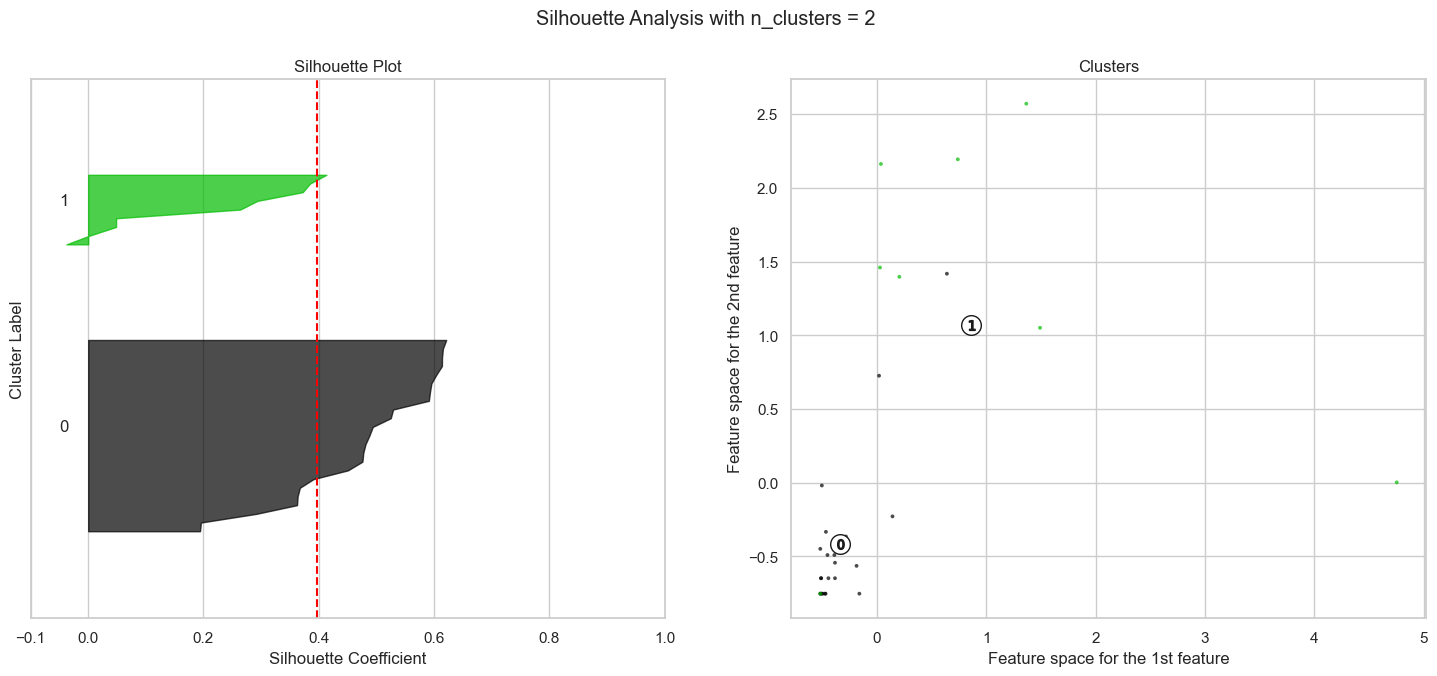

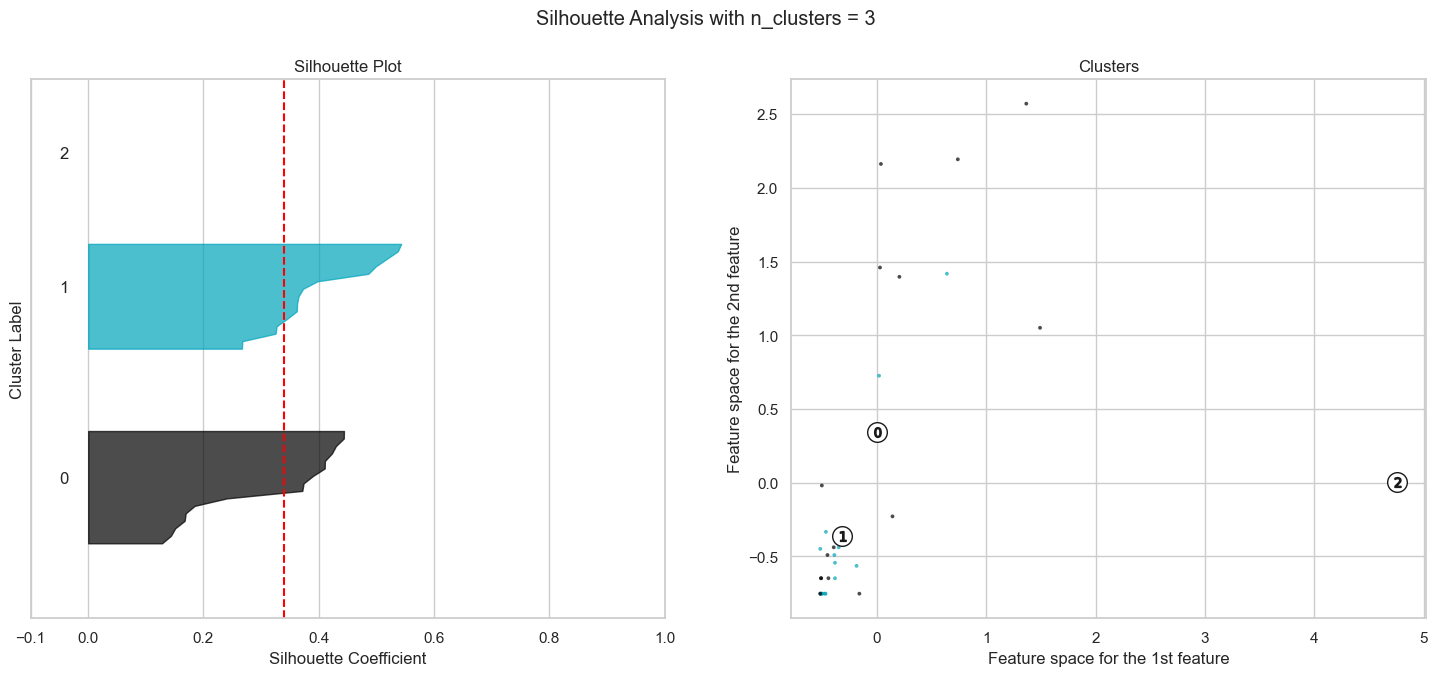

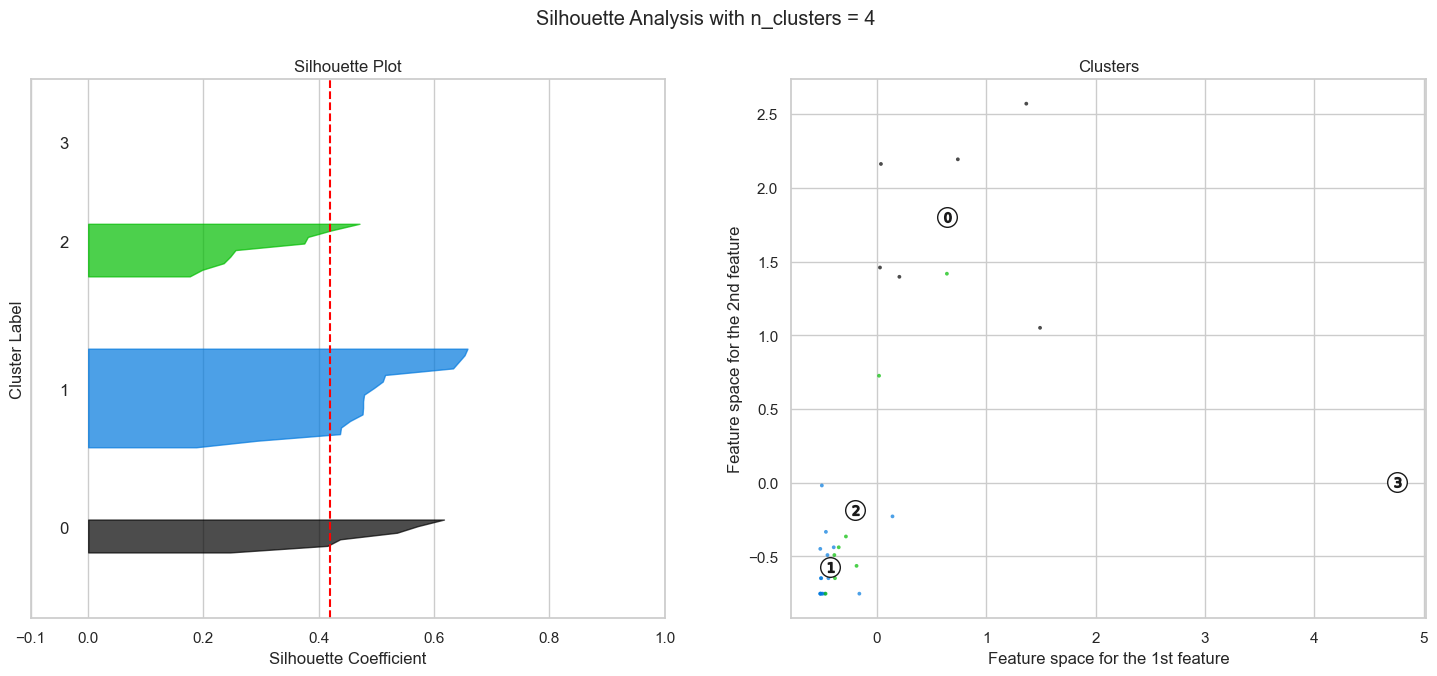

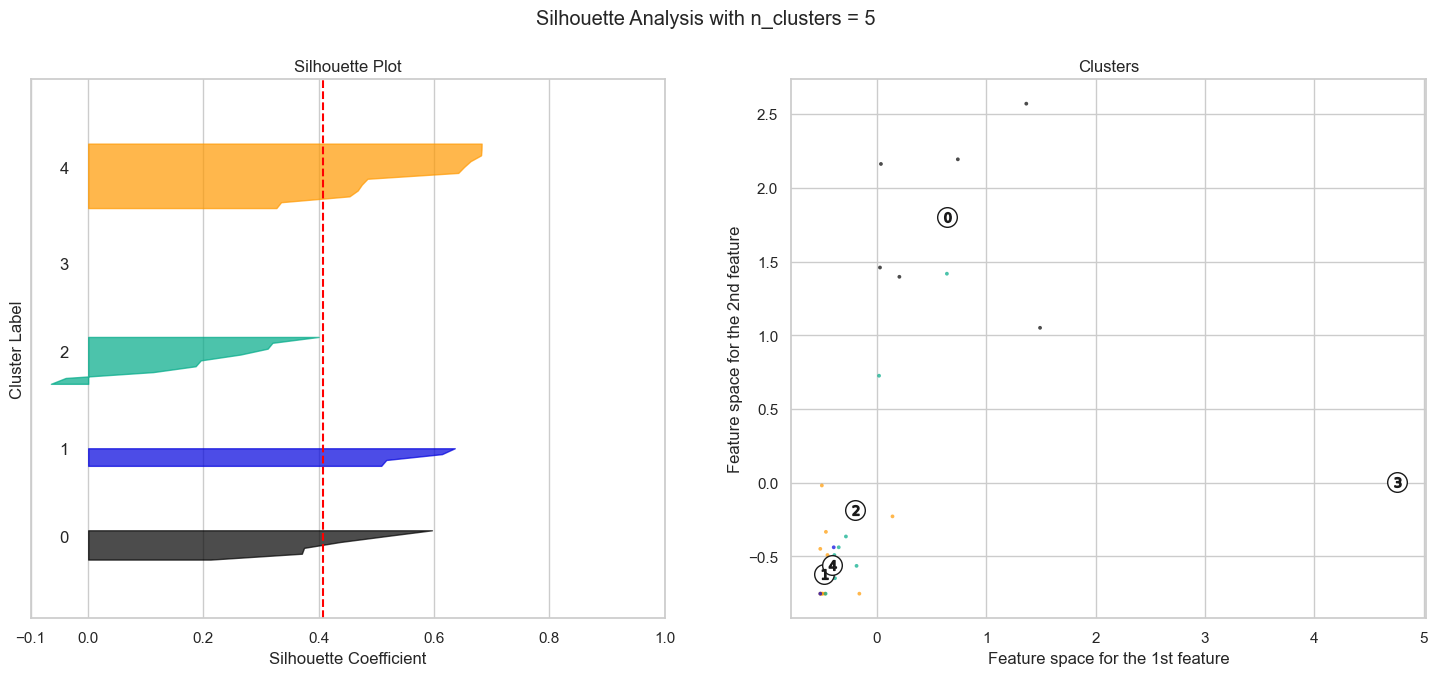

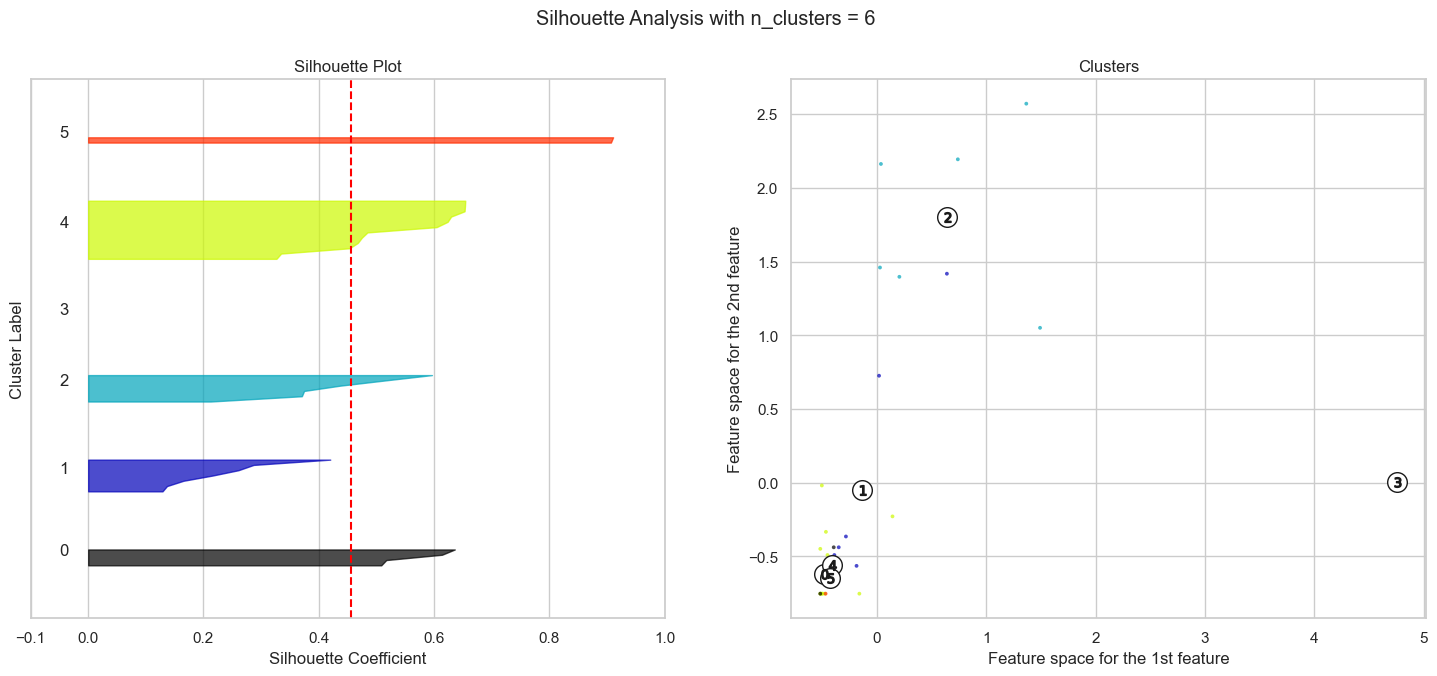

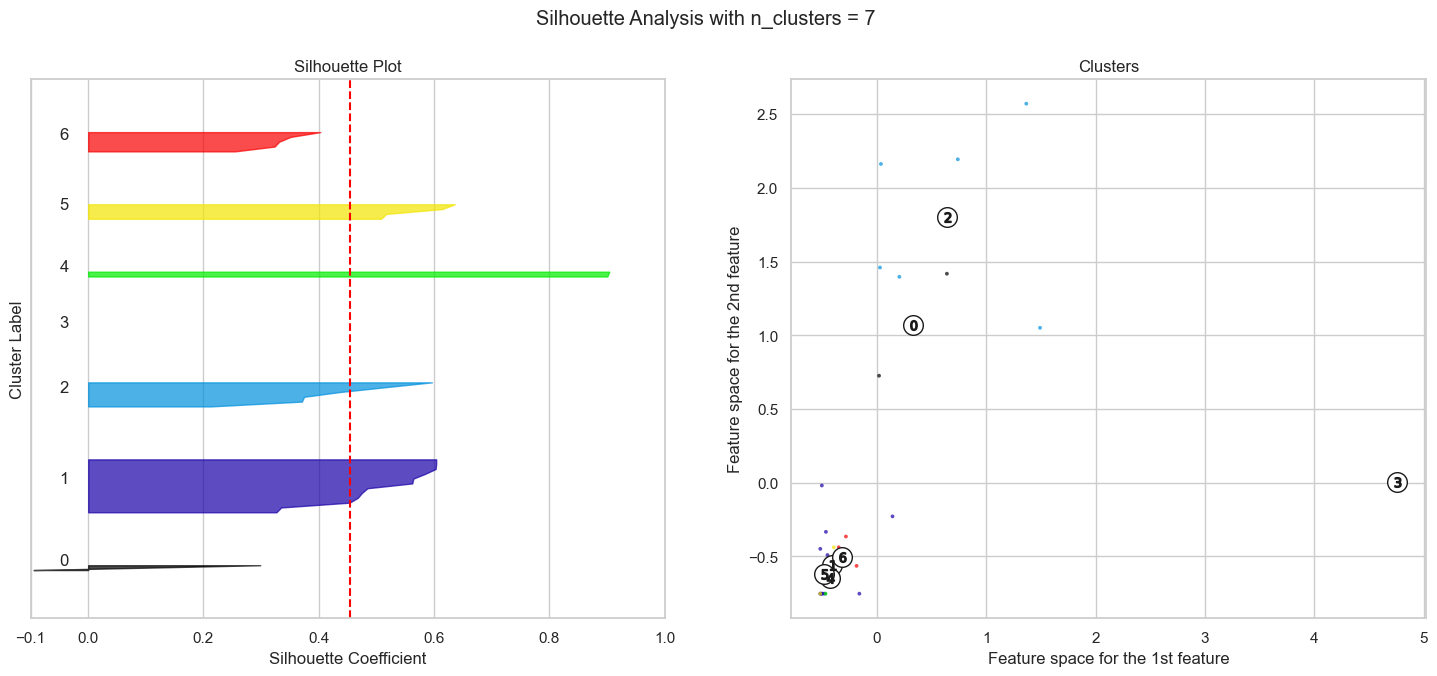

In [445]:
range_n_clusters = [2, 3, 4, 5, 6,7]
scaled_feat = np.array(features)
for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # the silhouette coefficient can range from [-1, 1]
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(scaled_feat) + (n_clusters + 1) * 10])

    # initializing the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(scaled_feat)
    silhouette_avg = silhouette_score(scaled_feat, cluster_labels, random_state =1)    
    sample_silhouette_values = silhouette_samples(scaled_feat, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
        
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster Label")

    # the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    # clear the yaxis labels / ticks
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_feat[:, 0], scaled_feat[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')  
    
    # labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clusters")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette Analysis with n_clusters = %d" % n_clusters)

plt.show() 

In [446]:
kmeans = KMeans(n_clusters=4, random_state=1)
cls = kmeans.fit(features)
features['cluster'] = cls.labels_

In [447]:
features['State Name'] = df['State Name']

In [448]:
features.shape

(32, 6)

In [449]:
features.head()

,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential,Zone,cluster,State Name
0,-0.512115,-0.648041,-0.609198,4,1,Andaman & Nicobar Island
1,-0.494958,-0.752881,-0.832441,2,1,Arunachal Pradesh
2,-0.383438,-0.543201,2.133278,2,2,Assam
3,-0.283357,-0.364974,0.885230,1,2,Bihar
4,-0.503537,-0.019002,-0.030524,3,1,Chandigarh


#### Cluster_0

In [450]:
cluster_0 = features[features.cluster ==0]
print(len(cluster_0))
cluster_0.describe()

6


,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential,Zone,cluster
count,6.000000,6.000000,6.000000,6.000000,6.0
mean,0.645021,1.805211,-0.130417,4.166667,0.0
std,0.661955,0.586504,0.254791,0.752773,0.0
min,0.028327,1.050364,-0.424445,3.000000,0.0
25%,0.079083,1.412062,-0.340908,4.000000,0.0
50%,0.472976,1.810453,-0.141713,4.000000,0.0
75%,1.210007,2.185256,0.086051,4.750000,0.0
max,1.492381,2.570542,0.170705,5.000000,0.0


In [451]:
features['EV_potential'].max()

3.5058109467424217

In [452]:
features['EV_potential'].mean()

-1.0408340855860843e-16

In [453]:
cluster_0['State Name'].unique()

array(['Gujarat', 'Karnataka', 'Kerala', 'Maharashtra', 'Rajasthan',
       'Tamil Nadu'], dtype=object)

In [454]:
# Most of the states belonging to this cluster are prosperous states with well to do middle class population and lot of 
# business and job opportunity.
# The Ev potential is moderate to high.
# Most of the states within the cluster having comparatively high EV infrastructure.
# These states getting high response from the Government in terms of getting high number of Ev charging stations sanctioned.
# Ev company can launch moderate to high end personal and family cars to these geographical locations.
# This cluster is also suitable for launching large EV public transports.

#### cluster_1

In [455]:
cluster_1 = features[features['cluster'] == 1]
len(cluster_1)

16

In [456]:
cluster_1.describe()

,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential,Zone,cluster
count,16.000000,16.000000,16.000000,16.000000,16.0
mean,-0.427582,-0.573343,-0.575602,3.000000,1.0
std,0.175927,0.226055,0.278512,1.032796,0.0
min,-0.517834,-0.752881,-0.835177,2.000000,1.0
25%,-0.512830,-0.752881,-0.804986,2.000000,1.0
50%,-0.499247,-0.648041,-0.655377,3.000000,1.0
75%,-0.449921,-0.446225,-0.495994,3.250000,1.0
max,0.142706,-0.019002,-0.030524,5.000000,1.0


In [457]:
cluster_1['State Name'].unique()

array(['Andaman & Nicobar Island', 'Arunachal Pradesh', 'Chandigarh',
       'Goa', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Ladakh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Puducherry', 'Punjab', 'Sikkim', 'UT of DNH and DD'], dtype=object)

In [458]:
# This cluster mostly consist of Union territories along with Goa, Haryana, Himachal Pradesh and Punjab etc.
# Majority of the states belong to this cluster are from Northern Zone and North Eastern zone.
# This cluster is having comparatively low EV potential.
# These states having Low EV infrastructure.
# Suitable for small Electric transport vehicles and 2 wheelers.

#### Cluster_2

In [459]:
cluster_2 = features[features.cluster == 2]
print(len(cluster_2))

9


In [460]:
cluster_2

,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential,Zone,cluster,State Name
2,-0.383438,-0.543201,2.133278,2,2,Assam
3,-0.283357,-0.364974,0.885230,1,2,Bihar
5,-0.389157,-0.490782,-0.181948,0,2,Chhattisgarh
12,-0.349125,-0.438362,-0.285188,1,2,Jharkhand
21,-0.186134,-0.564169,-0.332484,1,2,Odisha
27,-0.469223,-0.752881,2.218457,2,2,Tripura
29,-0.383438,-0.648041,1.176016,0,2,Uttarakhand
30,0.640256,1.417304,0.971715,0,2,Uttar Pradesh
31,0.019748,0.725361,-0.098761,1,2,West Bengal


In [461]:
cluster_2.describe()

,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential,Zone,cluster
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,-0.198208,-0.184416,0.720702,0.888889,2.0
std,0.346271,0.741214,1.008919,0.781736,0.0
min,-0.469223,-0.752881,-0.332484,0.000000,2.0
25%,-0.383438,-0.564169,-0.181948,0.000000,2.0
50%,-0.349125,-0.490782,0.885230,1.000000,2.0
75%,-0.186134,-0.364974,1.176016,1.000000,2.0
max,0.640256,1.417304,2.218457,2.000000,2.0


In [462]:
cluster_2["State Name"].unique()

array(['Assam', 'Bihar', 'Chhattisgarh', 'Jharkhand', 'Odisha', 'Tripura',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal'], dtype=object)

In [ ]:
# Most of These states belong to Eastern and Central region.
# States belonging to this cluster is having moderate to high EV Potential.
# These states rapidly working on building EV infrastructures.
# Government has sanctioned for installing many new EV charging station in states like West Bengal, Uttar Pradesh etc.
# This cluster is suitable for launching small EV public transports and low to moderate range EV Cars.

#### Cluster_3

In [463]:
cluster_3 = features[features.cluster == 3]
print(len(cluster_3))

1


In [464]:
cluster_3.describe()

,No. of Operational PCS,No. of EV chargers sanctioned,EV_potential,Zone,cluster
count,1.000000,1.000000,1.000000,1.0,1.0
mean,4.755048,0.001966,3.505811,3.0,3.0
std,NaN,NaN,NaN,NaN,NaN
min,4.755048,0.001966,3.505811,3.0,3.0
25%,4.755048,0.001966,3.505811,3.0,3.0
50%,4.755048,0.001966,3.505811,3.0,3.0
75%,4.755048,0.001966,3.505811,3.0,3.0
max,4.755048,0.001966,3.505811,3.0,3.0


In [466]:
cluster_3['State Name']

6    Delhi
Name: State Name, dtype: object

In [467]:
# This cluster only consist of National Capital Delhi.
# It's having high demand of EV because of it's pollution condition.
# Delhi is having very good EV industry.
# It is also having very good EV infrastructure.
# It will be a good market for the EV company to launch both public transport and personal vehicles of medium to high price
# range.